In [1]:
import pandas as pd
import numpy as np

In [3]:
df_classical = pd.read_csv('classical_ml_EVAL/Classical_ml_EVAL.csv')
df_bert = pd.read_csv('BERT_EVAL/BERT_eval.csv')
df_article = pd.read_csv('SummaC_Results/Pipeline_Article.csv')
df_qna = pd.read_csv('SummaC_Results/Pipeline_QNA.csv')
df_phi = pd.read_csv('SummaC_Results/Pipeline_SLM(Phi).csv')
df_mistral = pd.read_csv('SummaC_Results/Pipeline_SLM(Mistral).csv')

In [4]:
df_classical = df_classical[['Headline','MultinomialNB Model Decision','LogisticRegression Model Decision']]
df_bert = df_bert[['Headline','BERT Model Decision']]
df_article = df_article[['Headline','Actual Decision','Article_SummaC ZS Decision']]
df_qna = df_qna[['Headline','QNA_SummaC ZS Decision']]
df_phi = df_phi[['Headline','SummaC ZS Decision']].rename(columns={'SummaC ZS Decision': 'Phi_SummaC ZS Decision'})
df_mistral = df_mistral[['Headline','SummaC ZS Decision']].rename(columns={'SummaC ZS Decision': 'Mistral_SummaC ZS Decision'})

In [5]:
# Perform the left joins
df_merged = df_article.merge(df_classical, on='Headline', how='left')\
                      .merge(df_bert, on='Headline', how='left')\
                      .merge(df_qna, on='Headline', how='left')\
                      .merge(df_phi, on='Headline', how='left')\
                      .merge(df_mistral, on='Headline', how='left')

df_merged = df_merged.drop_duplicates(subset=['Headline'])

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Headline                           687 non-null    object
 1   Actual Decision                    687 non-null    bool  
 2   Article_SummaC ZS Decision         687 non-null    bool  
 3   MultinomialNB Model Decision       685 non-null    object
 4   LogisticRegression Model Decision  685 non-null    object
 5   BERT Model Decision                685 non-null    object
 6   QNA_SummaC ZS Decision             686 non-null    object
 7   Phi_SummaC ZS Decision             685 non-null    object
 8   Mistral_SummaC ZS Decision         687 non-null    bool  
dtypes: bool(3), object(6)
memory usage: 39.6+ KB


In [7]:
df_merged.columns

Index(['Headline', 'Actual Decision', 'Article_SummaC ZS Decision',
       'MultinomialNB Model Decision', 'LogisticRegression Model Decision',
       'BERT Model Decision', 'QNA_SummaC ZS Decision',
       'Phi_SummaC ZS Decision', 'Mistral_SummaC ZS Decision'],
      dtype='object')

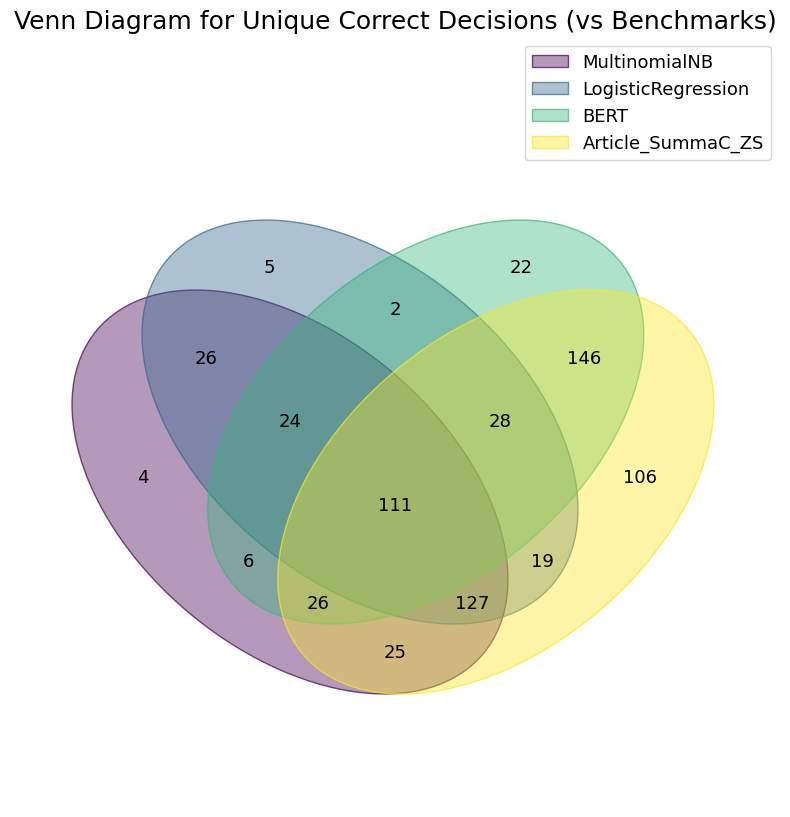

In [8]:
# Venn Diagram comparing unique correct decisions for Classical ML vs BERT vs Our Best Pipeline
from venn import venn,pseudovenn
import pandas as pd
import matplotlib.pyplot as plt

df_merged['Correct_MultinomialNB'] = df_merged['MultinomialNB Model Decision'] == df_merged['Actual Decision']
df_merged['Correct_LogisticRegression'] = df_merged['LogisticRegression Model Decision'] == df_merged['Actual Decision']
df_merged['Correct_BERT'] = df_merged['BERT Model Decision'] == df_merged['Actual Decision']
df_merged['Correct_Article_SummaC_ZS'] = df_merged['Article_SummaC ZS Decision'] == df_merged['Actual Decision']
df_merged['Correct_QNA_SummaC_ZS'] = df_merged['QNA_SummaC ZS Decision'] == df_merged['Actual Decision']
df_merged['Correct_Phi_SummaC_ZS'] = df_merged['Phi_SummaC ZS Decision'] == df_merged['Actual Decision']
df_merged['Correct_Mistral_SummaC_ZS'] = df_merged['Mistral_SummaC ZS Decision'] == df_merged['Actual Decision']

set_multinomialnb = set(df_merged[df_merged['Correct_MultinomialNB']].index)
set_logisticregression = set(df_merged[df_merged['Correct_LogisticRegression']].index)
set_bert = set(df_merged[df_merged['Correct_BERT']].index)
set_article_summac_zs = set(df_merged[df_merged['Correct_Article_SummaC_ZS']].index)
set_qna_summac_zs = set(df_merged[df_merged['Correct_QNA_SummaC_ZS']].index)
set_phi_summac_zs = set(df_merged[df_merged['Correct_Phi_SummaC_ZS']].index)
set_mistral_summac_zs = set(df_merged[df_merged['Correct_Mistral_SummaC_ZS']].index)

sets_dict = {
    'MultinomialNB': set_multinomialnb,
    'LogisticRegression': set_logisticregression,
    'BERT': set_bert,
    'Article_SummaC_ZS': set_article_summac_zs,
}

fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Correct Decisions (vs Benchmarks)", fontsize=18)
plt.show()

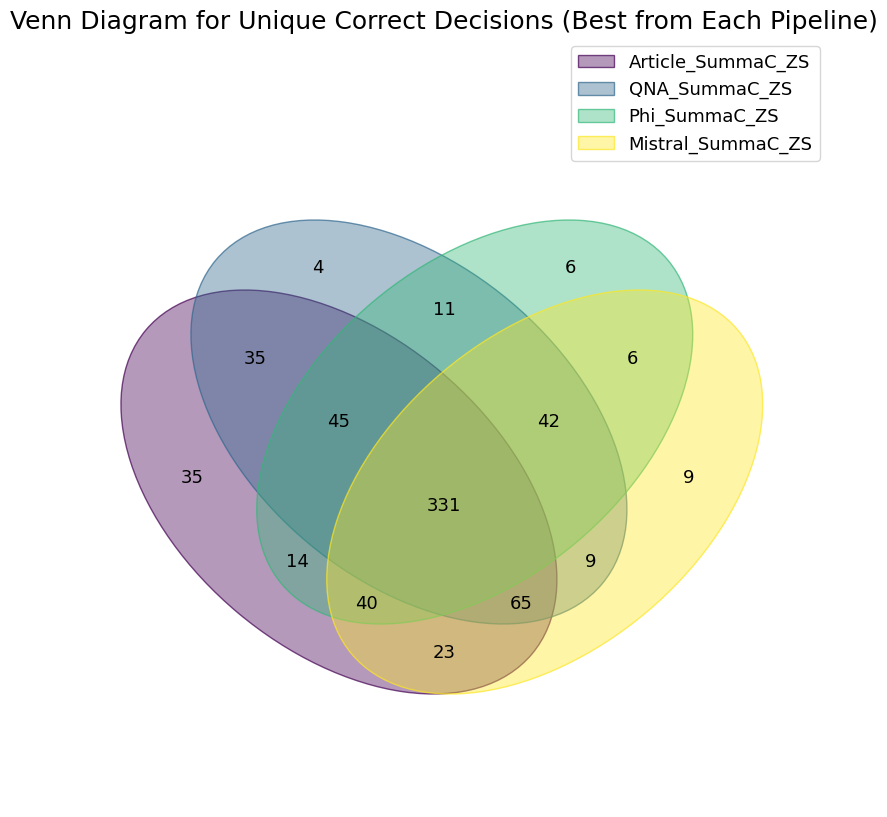

In [9]:
# Venn Diagram comparing unique correct decisions for Best from our 4 pipelines
sets_dict = {
    'Article_SummaC_ZS': set_article_summac_zs,
    'QNA_SummaC_ZS': set_qna_summac_zs,
    'Phi_SummaC_ZS': set_phi_summac_zs,
    'Mistral_SummaC_ZS': set_mistral_summac_zs,
}

fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Correct Decisions (Best from Each Pipeline)", fontsize=18)
plt.show()

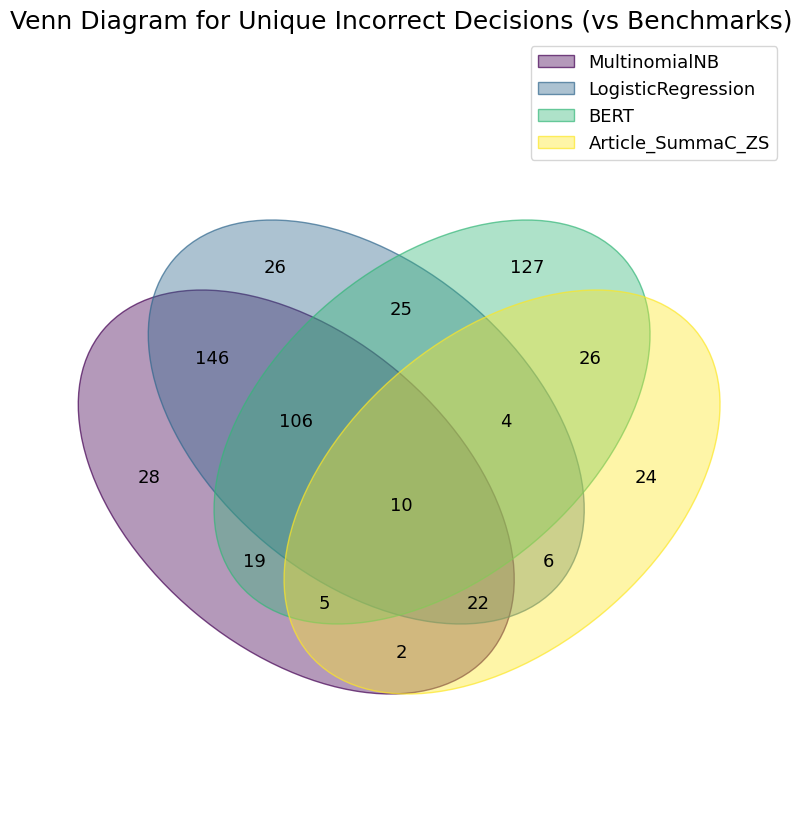

In [10]:
# Venn Diagram comparing unique incorrect decisions for Classical ML vs BERT vs Our Best Pipeline
from venn import venn
import pandas as pd
import matplotlib.pyplot as plt

df_merged['Incorrect_MultinomialNB'] = df_merged['MultinomialNB Model Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_LogisticRegression'] = df_merged['LogisticRegression Model Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_BERT'] = df_merged['BERT Model Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_Article_SummaC_ZS'] = df_merged['Article_SummaC ZS Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_QNA_SummaC_ZS'] = df_merged['QNA_SummaC ZS Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_Phi_SummaC_ZS'] = df_merged['Phi_SummaC ZS Decision'] != df_merged['Actual Decision']
df_merged['Incorrect_Mistral_SummaC_ZS'] = df_merged['Mistral_SummaC ZS Decision'] != df_merged['Actual Decision']

set_multinomialnb = set(df_merged[df_merged['Incorrect_MultinomialNB']].index)
set_logisticregression = set(df_merged[df_merged['Incorrect_LogisticRegression']].index)
set_bert = set(df_merged[df_merged['Incorrect_BERT']].index)
set_article_summac_zs = set(df_merged[df_merged['Incorrect_Article_SummaC_ZS']].index)
set_qna_summac_zs = set(df_merged[df_merged['Incorrect_QNA_SummaC_ZS']].index)
set_phi_summac_zs = set(df_merged[df_merged['Incorrect_Phi_SummaC_ZS']].index)
set_mistral_summac_zs = set(df_merged[df_merged['Incorrect_Mistral_SummaC_ZS']].index)

sets_dict = {
    'MultinomialNB': set_multinomialnb,
    'LogisticRegression': set_logisticregression,
    'BERT': set_bert,
    'Article_SummaC_ZS': set_article_summac_zs,
}

fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Incorrect Decisions (vs Benchmarks)", fontsize=18)
plt.show()

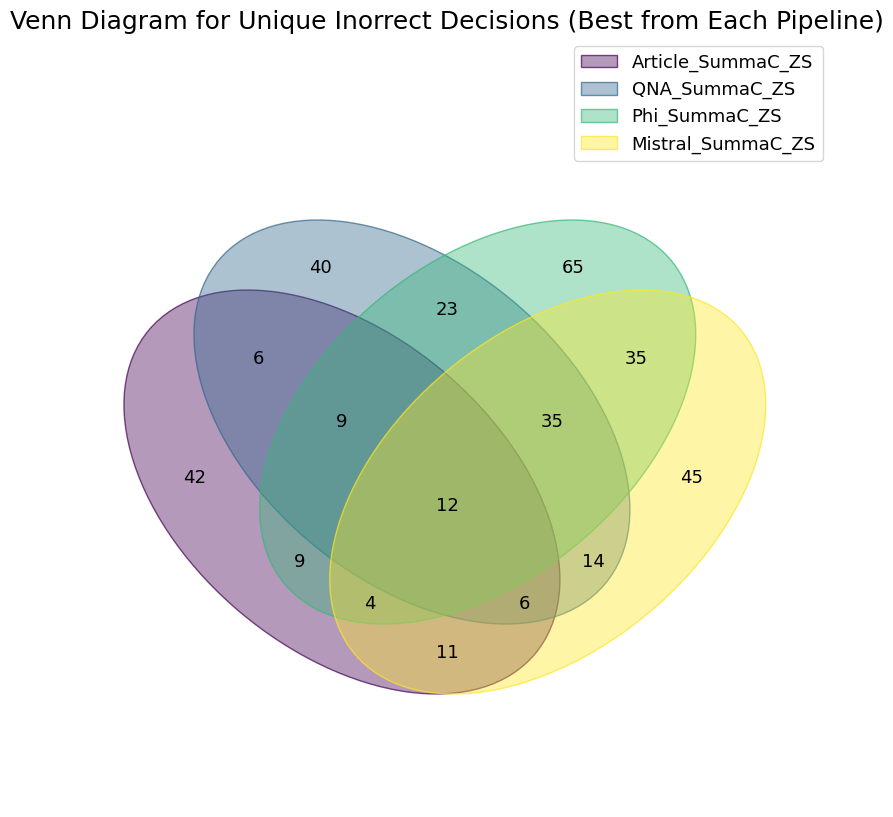

In [11]:
# Venn Diagram comparing unique incorrect decisions for Best from our 4 pipelines
sets_dict = {
    'Article_SummaC_ZS': set_article_summac_zs,
    'QNA_SummaC_ZS': set_qna_summac_zs,
    'Phi_SummaC_ZS': set_phi_summac_zs,
    'Mistral_SummaC_ZS': set_mistral_summac_zs,
}

fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Inorrect Decisions (Best from Each Pipeline)", fontsize=18)
plt.show()

In [12]:
# Compating the Top 5 Best performers
df_first = pd.read_csv('SummaC_Results/Pipeline_Article.csv')
df_second = pd.read_csv('SummaC_Results/Pipeline_Article.csv') 
df_third = pd.read_csv('FactCC_Results/Pipeline_Article.csv', delimiter='|')
df_fourth = pd.read_csv('SummaC_Results/Pipeline_QNA.csv')
df_fifth = pd.read_csv('SummaC_Results/Pipeline_SLM(Mistral).csv')

In [13]:
df_third.columns

Index(['Index', 'Headline', 'Scraped Content', 'Model Decision',
       'Actual Decision'],
      dtype='object')

In [14]:
df_first = df_first[['Headline','Actual Decision','Article_SummaC ZS Decision']]
df_second = df_second[['Headline','Article_SummaC Conv Decision']]
df_third = df_third[['Headline','Model Decision']].rename(columns={'Model Decision': 'Article_FactCC Decision'})
df_fourth = df_fourth[['Headline','QNA_SummaC ZS Decision']]
df_fifth = df_fifth[['Headline','SummaC ZS Decision']].rename(columns={'SummaC ZS Decision': 'Mistral_SummaC ZS Decision'})

In [15]:
df_merged_top = df_first.merge(df_second, on='Headline', how='left')\
                      .merge(df_third, on='Headline', how='left')\
                      .merge(df_fourth, on='Headline', how='left')\
                      .merge(df_fifth, on='Headline', how='left')

df_merged_top = df_merged_top.drop_duplicates(subset=['Headline'])

In [16]:
df_merged_top.columns

Index(['Headline', 'Actual Decision', 'Article_SummaC ZS Decision',
       'Article_SummaC Conv Decision', 'Article_FactCC Decision',
       'QNA_SummaC ZS Decision', 'Mistral_SummaC ZS Decision'],
      dtype='object')

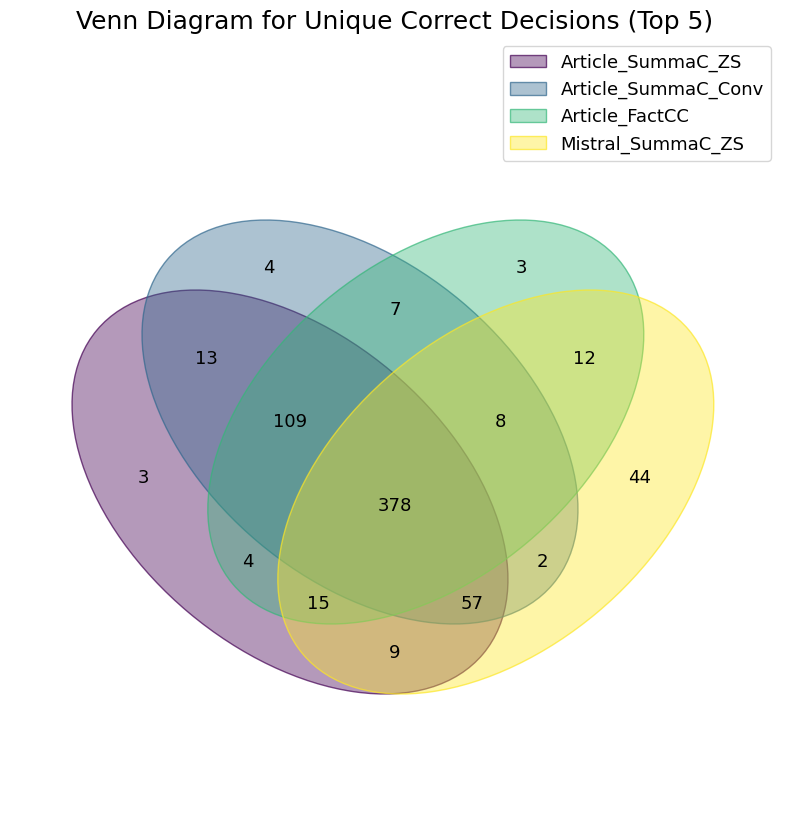

In [17]:
#Venn Diagram Comparing unique Correct for our best 4 Pipelines
from venn import venn
import pandas as pd
import matplotlib.pyplot as plt

df_merged_top['Correct_Article_SummaC_ZS'] = df_merged_top['Article_SummaC ZS Decision'] == df_merged_top['Actual Decision']
df_merged_top['Correct_Article_SummaC_Conv'] = df_merged_top['Article_SummaC Conv Decision'] == df_merged_top['Actual Decision']
df_merged_top['Correct_Article_FactCC'] = df_merged_top['Article_FactCC Decision'] == df_merged_top['Actual Decision']
df_merged_top['Correct_QNA_SummaC_ZS'] = df_merged_top['QNA_SummaC ZS Decision'] == df_merged_top['Actual Decision']
df_merged_top['Correct_Mistral_SummaC_ZS'] = df_merged_top['Mistral_SummaC ZS Decision'] == df_merged_top['Actual Decision']

set_article_summac_zs = set(df_merged_top[df_merged_top['Correct_Article_SummaC_ZS']].index)
set_article_summac_conv = set(df_merged_top[df_merged_top['Correct_Article_SummaC_Conv']].index)
set_article_factcc = set(df_merged_top[df_merged_top['Correct_Article_FactCC']].index)
set_qna_summac_zs = set(df_merged_top[df_merged_top['Correct_QNA_SummaC_ZS']].index)
set_mistral_summac_z = set(df_merged_top[df_merged_top['Correct_Mistral_SummaC_ZS']].index)

sets_dict = {
    'Article_SummaC_ZS': set_article_summac_zs,
    'Article_SummaC_Conv': set_article_summac_conv,
    'Article_FactCC': set_article_factcc,
    # 'QNA_SummaC_ZS': set_qna_summac_zs,
    'Mistral_SummaC_ZS':set_mistral_summac_z
}

# Plot the Venn diagram
fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Correct Decisions (Top 5)", fontsize=18)
plt.show()


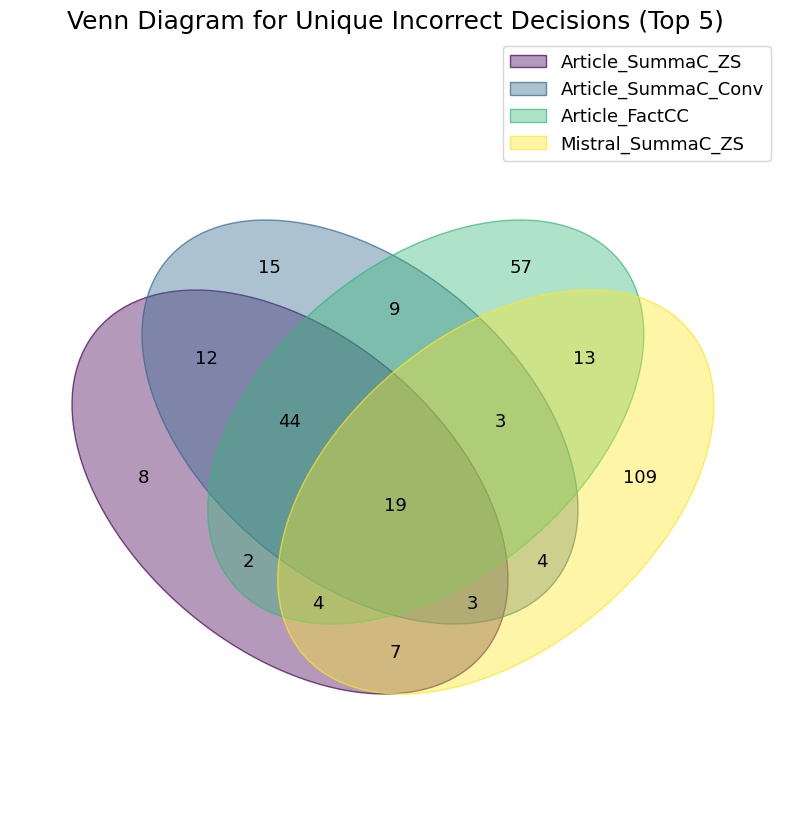

In [18]:
# Venn Diagram Comparing Unique Incorrect Decisions for Our Best 5 Pipelines
from venn import venn
import pandas as pd
import matplotlib.pyplot as plt

df_merged_top['Incorrect_Article_SummaC_ZS'] = df_merged_top['Article_SummaC ZS Decision'] != df_merged_top['Actual Decision']
df_merged_top['Incorrect_Article_SummaC_Conv'] = df_merged_top['Article_SummaC Conv Decision'] != df_merged_top['Actual Decision']
df_merged_top['Incorrect_Article_FactCC'] = df_merged_top['Article_FactCC Decision'] != df_merged_top['Actual Decision']
df_merged_top['Incorrect_QNA_SummaC_ZS'] = df_merged_top['QNA_SummaC ZS Decision'] != df_merged_top['Actual Decision']
df_merged_top['Incorrect_Mistral_SummaC_ZS'] = df_merged_top['Mistral_SummaC ZS Decision'] != df_merged_top['Actual Decision']

set_article_summac_zs = set(df_merged_top[df_merged_top['Incorrect_Article_SummaC_ZS']].index)
set_article_summac_conv = set(df_merged_top[df_merged_top['Incorrect_Article_SummaC_Conv']].index)
set_article_factcc = set(df_merged_top[df_merged_top['Incorrect_Article_FactCC']].index)
set_qna_summac_zs = set(df_merged_top[df_merged_top['Incorrect_QNA_SummaC_ZS']].index)
set_mistral_summac_z = set(df_merged_top[df_merged_top['Incorrect_Mistral_SummaC_ZS']].index)

sets_dict = {
    'Article_SummaC_ZS': set_article_summac_zs,
    'Article_SummaC_Conv': set_article_summac_conv,
    'Article_FactCC': set_article_factcc,
    # 'QNA_SummaC_ZS': set_qna_summac_zs,
    'Mistral_SummaC_ZS':set_mistral_summac_z
}

fig, ax = plt.subplots(figsize=(10, 10))
venn(sets_dict, ax=ax)

plt.title("Venn Diagram for Unique Incorrect Decisions (Top 5)", fontsize=18)
plt.show()